# Исследование объявлений о продаже квартир

## Оглавление

+ [Описание проекта](#project_description)
+ [Описание данных](#data_description)
+ [Введение](#intro)
+ [1. Откройте файл с данными](#task_1)
    - [Задание 1.1 Загрузите данные](#task_1.1)
    - [Задание 1.2 Изучите общую информацию](#task_1.2)
    - [Задание 1.3 Постройте общую гистограмму](#task_1.3)
+ [2. Предобработка данных](#task_2)
    - [Задание 2.1 Найдите и изучите пропущенные значения](#task_2.1)
    - [Задание 2.2 Найдите и устраните редкие и выбивающиеся значения](#task_2.2)
    - [Задание 2.3 Изучите уникальные значения](#task_2.3)
+ [3. Добавьте в таблицу новые столбцы со следующими параметрами](#task_3)
+ [4. Проведите исследовательский анализ данных](#task_4)
    - [Задание 4.1 Изучите следующие параметры объектов](#task_4.1)
    - [Задание 4.2 Изучите, как быстро продавались квартиры](#task_4.2)
    - [Задание 4.3 Какие факторы больше всего влияют на общую стоимость объекта](#task_4.3)
    - [Задание 4.4 Посчитайте среднюю цену одного квадратного метра](#task_4.4)
    - [Задание 4.5 Выделите квартиры и вычислите среднюю цену каждого километра](#task_4.5)
+ [Вывод](#conclusion)

## <a name="project_description"></a>  Описание проекта

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

## <a name="data_description"></a> Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## <a name="data_description"></a> Введение

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

###  <a name="task_1"></a> 1. Откройте файл с данными и изучите общую информацию. 

#### <a name="task_1.1"></a>  1.1 Загрузите данные из файла в датафрейм.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

from io import BytesIO
import requests
import pandas as pd
spreadsheet_id = '1PVE_U8KnP2tFdb48u0psELUNaI4EowvMyG5HAoCcsbU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07 0:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04 0:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20 0:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24 0:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19 0:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21 0:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15 0:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11 0:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28 0:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### <a name="task_1.2"></a>  1.2 Изучите общую информацию о полученном датафрейме.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- Мы видим что столбец "first_day_exposition" имеет тип данных object, а по идее это должен быть столбец с датами и временем. Тип данных столбца мы исправим ниже по ходу решения.
- Также многие из столцов можно перевести в тип int, так как в них представлены целочисленные данные. Это мы тоже исправляем ниже.

#### <a name="task_1.3"></a>  1.3 Постройте общую гистограмму для всех столбцов таблицы. Например, для датафрейма data это можно сделать командой data.hist(figsize=(15, 20)).

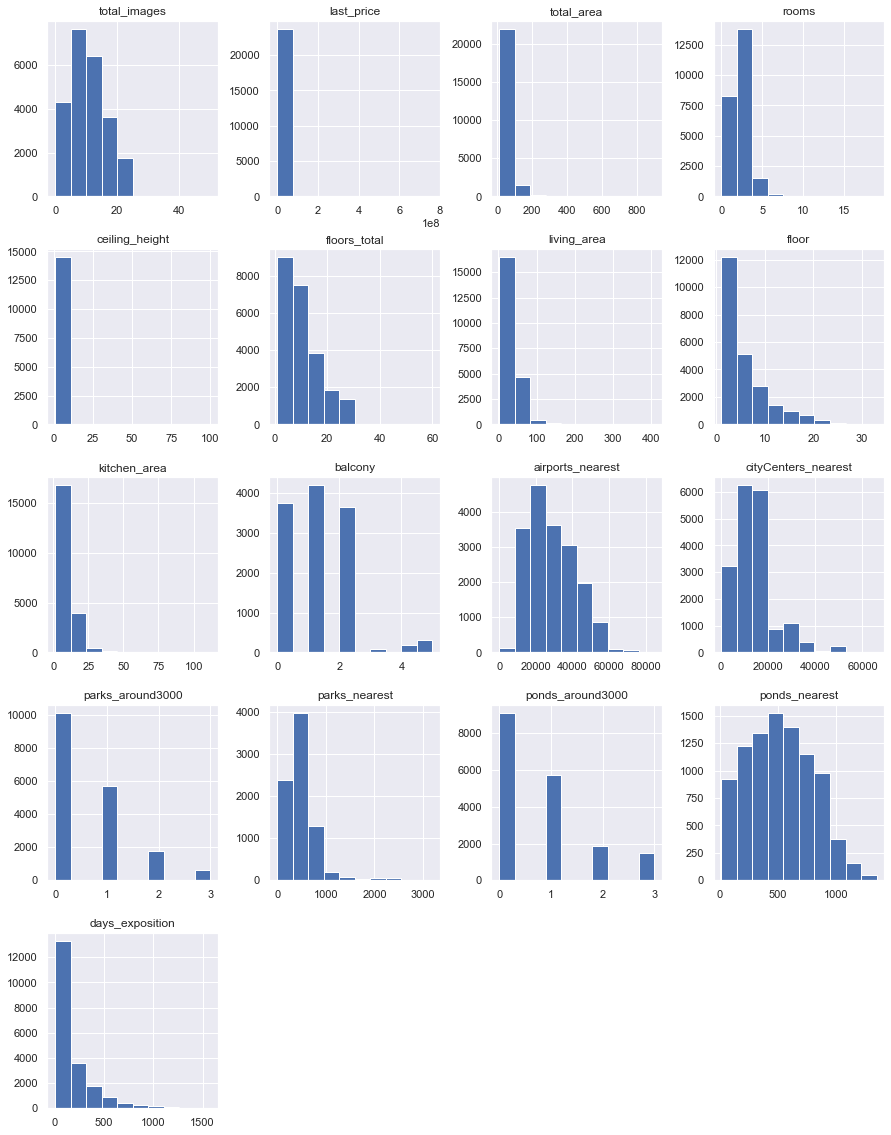

In [3]:
data.hist(figsize=(15, 20));

Гистограммы "last_price", "total_area" и "ceiling_hight" выглядят странно и совсем не информативно. Скорее всего это происходит, потому что в данных есть выбросы, то есть какие-то значения, которые очень сильно отличаются от основной массы данных. С выбросами мы поработаем ниже в проекте и еще так же ниже мы еще раз перестроим эти гистограммы в более наглядном виде.

### <a name="task_2"></a> 2. Предобработка данных

#### <a name="task_2.1"></a> 2.1 Найдите и изучите пропущенные значения в столбцах:

**Определяем, в каких столбцах есть пропуски.**

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.**

В столбце 'balcony' пропущенные некоторые значения, скорее всего это означает что балконов в квартире просто нет, поэтому заменим эти значения на 0 и преобразуем все значения в столбце на целочисленные данные, так как колличество балконов не может быть дробным.

In [5]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
display(data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Убираем пустые значения в столбце с колличеством этажей

In [6]:
data = data.dropna(subset = ['floors_total']).reset_index(drop=True)

Заменяем пустые значения на медианные в столбце 'ceiling_height', так же отрезаем все строки, где высота потолков больше 10 метров и удаляем их.

In [7]:
import warnings

warnings.filterwarnings("ignore")

replace_with_median = data.groupby('floors_total')['ceiling_height'].median()

for total in data['floors_total'].unique():
    data.loc[(data['floors_total'] == total) & (data['ceiling_height'].isna()), 'ceiling_height'] = replace_with_median[total]

data.loc[data['ceiling_height'] > 10,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height'])
print(data['ceiling_height'][data['ceiling_height'] > 10].count())

0


Проверим столбец с колличеством комнат

In [8]:
data['rooms'].unique()
data['rooms'].value_counts()

1     8008
2     7900
3     5790
4     1176
5      325
0      193
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Дополнительный тестовый фильтр, чтобы посмотреть, какие действительно квартиры имеют 0 комнат в изначальных данных.


In [9]:
test_2 = data.loc[data['rooms'] == 0]
test_2['studio'].value_counts()

True     135
False     58
Name: studio, dtype: int64

Мы видим, что из всех квартир с нулем комнат, 135 действительно являются студиями, но 58 (более 30 процентов) не являются студиями, или продавец забыл это указать.


In [10]:
test_3 = data.loc[data['studio'] == True]
test_3['rooms'].value_counts()

0    135
1     11
Name: rooms, dtype: int64

Мы видим, что из всех квартир студий, 135 имеют ноль в парамере комнат, а 11 имеют 1 в параметре комнат.


In [11]:
# Заменяем нулевые значения на 1
data['rooms'] = data['rooms'].replace(0, 1)
# Проверка
data['rooms'].describe()

count    23586.000000
mean         2.079496
std          1.066576
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Я считаю, что чтобы в будущем не путаться, где у нас студия, где нет, и сколько в ней должно быть комнат, следует, все-таки заменить нулевое колличество комнат на 1, но при этом у этих квартир в параметре студия все равно останется пометка, что они являются студией, и если нам понадобиться, мы всегда сможем отобрать и посмотреть их отдельно от всех остальных квартир. 


Проверяем столбец с площадью квартир

In [12]:
data['total_area'].describe()

count    23586.000000
mean        60.346758
std         35.661784
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

В данных присутствует необычная квартира с площадью 900 кв метров, возьмем ее на заметку

Проверяем столбец с ценой на момент снятия с публикации

In [13]:
data['last_price'].describe()

count    2.358600e+04
mean     6.542156e+06
std      1.090742e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В данных есть квартира за 73 млн рублей, это много по сравнению с средней ценой в 6.5 млн, но в целом, такая цена реальна. Так же есть квартира за 430к, как по мне, это слишком низкая цена за квартиру.

#### <a name="task_2.2"></a> 2.2 Найдите и устраните редкие и выбивающиеся значения.

Приведем данные к более реальному виду, без экстремаьлно дешевых квартир, высоченных потолков и огромных площадей.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23586 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23586 non-null  int64  
 1   last_price            23586 non-null  float64
 2   total_area            23586 non-null  float64
 3   first_day_exposition  23586 non-null  object 
 4   rooms                 23586 non-null  int64  
 5   ceiling_height        23586 non-null  float64
 6   floors_total          23586 non-null  float64
 7   living_area           21716 non-null  float64
 8   floor                 23586 non-null  int64  
 9   is_apartment          2762 non-null   object 
 10  studio                23586 non-null  bool   
 11  open_plan             23586 non-null  bool   
 12  kitchen_area          21360 non-null  float64
 13  balcony               23586 non-null  int32  
 14  locality_name         23538 non-null  object 
 15  airports_nearest   

In [15]:
data = data.query('last_price > 500000 & rooms <= 10 & (total_area > 30 | total_area < 600)')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23560 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23560 non-null  int64  
 1   last_price            23560 non-null  float64
 2   total_area            23560 non-null  float64
 3   first_day_exposition  23560 non-null  object 
 4   rooms                 23560 non-null  int64  
 5   ceiling_height        23560 non-null  float64
 6   floors_total          23560 non-null  float64
 7   living_area           21696 non-null  float64
 8   floor                 23560 non-null  int64  
 9   is_apartment          2762 non-null   object 
 10  studio                23560 non-null  bool   
 11  open_plan             23560 non-null  bool   
 12  kitchen_area          21341 non-null  float64
 13  balcony               23560 non-null  int32  
 14  locality_name         23512 non-null  object 
 15  airports_nearest   

Как мы видим, перед фильтрацие у нас было 23586 строк данных, а после фильтрации осталось 23560. Это означает, что было отброшено ~1.1% данных.


Там где это возможно, заменяем пропущенные значения на медианные, там, где по каким либо причинам мы не можем раасчитать медианы, пока просто заменяем пропущенные значения на 0.

In [17]:
for col in data.columns:
    if col in [
        'ceiling_height',
    ]:
        data[col] = data[col].fillna(value=data[col].median())
        
    elif col in [
        'is_apartment',
        'balcony',
        'airports_nearest',
        'parks_around_3000',
        'ponds_around_3000',
        'parks_nearest',
        'ponds_nearest',
        'days_exposition'
    ]:
        data[col] = data[col].fillna(value=0)
        
    elif col == 'floors_total':
        data[col] = data[col].where(~data[col].isna(), data['floor'])

Заменяем пропущенные значения на медианы в столбце 'kitchen_area'. Медианы берем не общие, а по колличеству комнат в этих квартирах. Более логично что в квартирах где мало комнат, будут маленькие кухни, а в многокомнатных квартирах и кухню можно сделать побольше.

In [18]:
rep_with_med_kitchen = data.groupby('rooms')['kitchen_area'].median()

for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) 
           & (data['kitchen_area'].isna()), 'kitchen_area'] = rep_with_med_kitchen[total]

Удаляем все строки в которых не получилось сделать замену на медиану

In [19]:
data.loc[data['kitchen_area'] == 'nan','kitchen_area'] = None
data = data.dropna(subset=['kitchen_area'])
# display(data['kitchen_area'].value_counts())
# display(data['kitchen_area'].unique())

Заменяем пропуски в столбце 'living_area' на медианы, так же в зависимости от колличества комнат в квартире.

In [20]:
rep_with_med_rooms = data.groupby('rooms')['living_area'].median()

for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) 
             & (data['living_area'].isna()), 'living_area'] = rep_with_med_rooms[total]

Заемняем пропущенные значения в столбце апартаментов на False

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Заменяем тип данных в столбце с колличеством этажей на целочисленный

In [22]:
data['floors_total'] = data['floors_total'].astype(int)

#### <a name="task_2.3"></a> 2.3 Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.

Исключаем пропуски в столбце с названием начеленного пункта, затем заменяем ё на е, чтобы исключить повторения типа 'посёлок' и 'поселок'. После этого приводим типы поселков к одному виду.

In [23]:
data = data.dropna(subset=['locality_name'])
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','городской поселок')

### <a name="task_3"></a> 3. Добавьте в таблицу новые столбцы со следующими параметрами:

- цена одного квадратного метра;

In [24]:
data['area_price'] = data['last_price'] / data['total_area']

Для начала приводим столбец с датой к удобному виду, оставляя только год, месяц и день

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [26]:
data['day_of_announcement'] = data['first_day_exposition'].dt.weekday

- месяц публикации объявления;

In [27]:
data['month_of_announcement'] = data['first_day_exposition'].dt.month

- год публикации объявления;

In [28]:
data['year_of_announcement'] = data['first_day_exposition'].dt.year

- тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [29]:
def floor_type(row):
    if row['floor'] == 1:
        category = 'Первый'
    elif (row['floor'] != 1) & (row['floor'] == row['floors_total']):
        category = 'Последний'
    else:
        category = 'Другой'
    return category

In [30]:
data['floor_category'] = data.apply(floor_type, axis=1)

- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [31]:
data['dist_to_centre_in_km'] = (data['cityCenters_nearest']/1000).round()

Проверим наличие наших новых столбцов в таблице

In [32]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price,day_of_announcement,month_of_announcement,year_of_announcement,floor_category,dist_to_centre_in_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,0,...,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,Другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,0,...,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,0,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,0,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,0,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23608,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,0,...,796.0,3.0,381.0,0.0,72490.845228,1,3,2017,Другой,4.0
23609,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,0,...,0.0,NaN,0.0,45.0,52542.372881,0,1,2018,Другой,NaN
23610,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,0,...,0.0,NaN,0.0,0.0,44091.710758,6,2,2018,Первый,NaN
23611,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,0,...,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,Другой,10.0


### <a name="task_4"></a> 4. Проведите исследовательский анализ данных:

#### <a name="task_4.1"></a> 4.1 Изучите следующие параметры объектов:

- общая площадь;

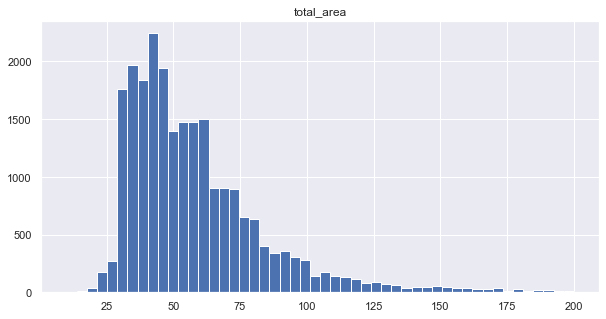

count    23512.000000
mean        60.230038
std         34.907338
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64


In [33]:
data.hist('total_area', bins=50, figsize = (10,5), range=(10,200))
plt.show()
print(data['total_area'].describe())

Гистограмма по площади квартир. Пик нахидится в диапазоне 25-50 квадратных метров. Квартиры площадью меньше 25кв метров практически отсутствуют (мы все таки не в Гонкоге), и квартир площадью больше 150 квадратов тоже очень мало.

- жилая площадь;

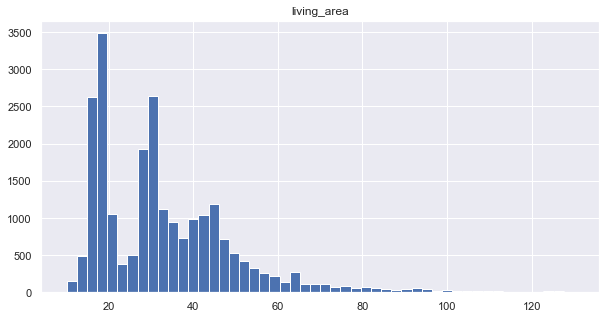

count    23512.000000
mean        34.264888
std         21.313811
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        347.500000
Name: living_area, dtype: float64


In [34]:
data.hist('living_area', bins=50, figsize = (10,5), range=(10,130))
plt.show()
print(data['living_area'].describe())

Гистограмма по жилой площади в квартирах. Здесь мы можем наблюдать два пика. Достаточно много квартир с жилой площадью чуть меньше 20 квадратных метром, но еще больше квартир с жилой площадью около 30 кв метров.

- площадь кухни;

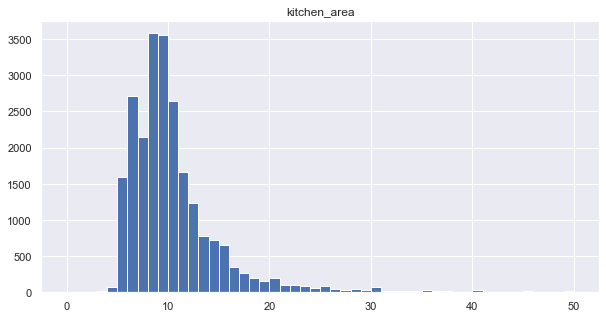

count    23512.000000
mean        10.435562
std          5.573039
min          1.300000
25%          7.300000
50%          9.040000
75%         11.500000
max        107.000000
Name: kitchen_area, dtype: float64


In [35]:
data.hist('kitchen_area', bins=50, figsize = (10,5), range=(0,50))
plt.show()
print(data['kitchen_area'].describe())

Гистограмма по площади кухни. Пик находится на площади в примерно 10кв метров. Есть достаточно много квартир с меньшей площадью кухни.

- цена объекта;

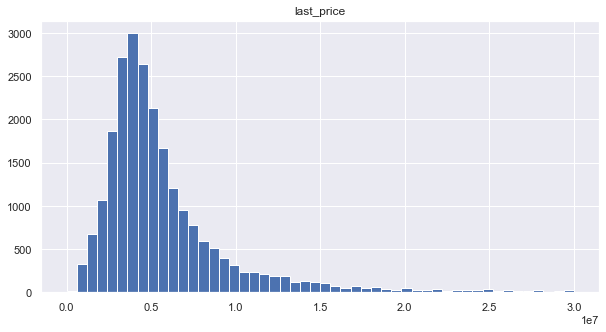

count    2.351200e+04
mean     6.520915e+06
std      1.057076e+07
min      5.200000e+05
25%      3.414500e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [36]:
data.hist('last_price', bins=50, figsize = (10,5), range=(0,30000000))
plt.show()
print(data['last_price'].describe())

Гистограмма по стимости продажи квартиры. Пик находится в районе 3-4 млн рублей за квартиру.

- количество комнат;

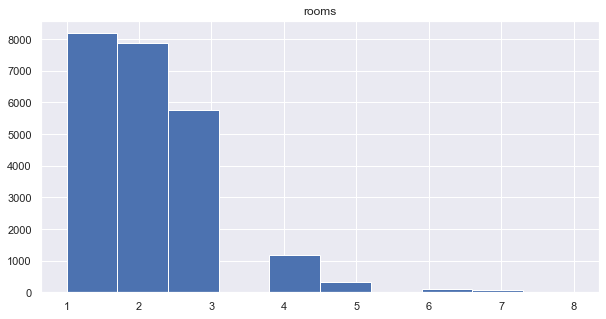

count    23512.000000
mean         2.075493
std          1.043134
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64


In [37]:
data.hist('rooms', bins=data['rooms'].max(), figsize = (10,5), range=(1,8))
plt.show()
print(data['rooms'].describe())

Гистограмма по колличеству комнат в квартирах. В основном присутсвуют квартиры с 1-3 комнатами. Редко встречаются квартиры с 7ю комнатами.

- высота потолков;

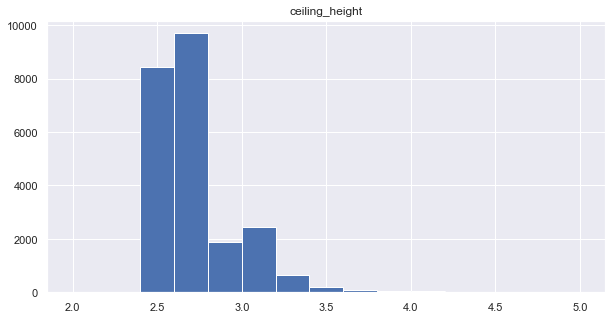

count    23512.000000
mean         2.708320
std          0.245734
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64


In [38]:
data.hist('ceiling_height', bins=15, figsize = (10,5), range=(2,5))
plt.show()
print(data['ceiling_height'].describe())

Гистограмма по выстоте потолков. В основном квартиры имеют высоту потолков от 2.5 до 3 метров.

- этаж квартиры;

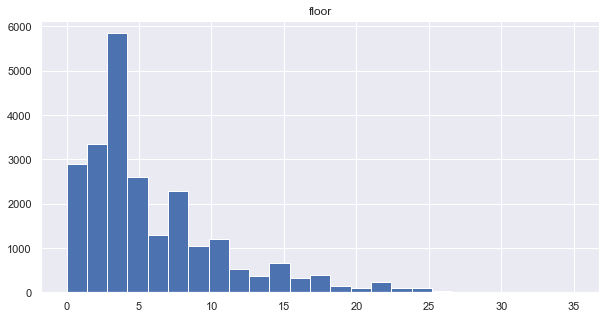

count    23512.000000
mean         5.877722
std          4.864291
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [39]:
data.hist('floor', bins=25, figsize = (10,5), range=(0,35))
plt.show()
print(data['floor'].describe())

Гистограмма по этажу квартиры. В основном квартиры находятся ниже 5-ого этажа, есть так же локальный пик в районе 8ого этажа.

- тип этажа квартиры («первый», «последний», «другой»);

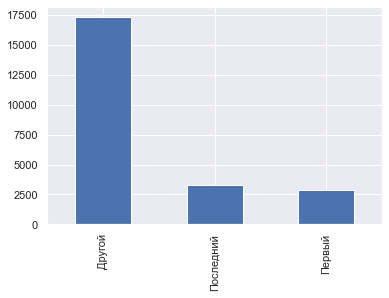

In [40]:
test = data['floor_category'].value_counts()
test.plot(kind='bar')
plt.show()
# print(data['floor_category'].describe())

Гистограмма по типу этажа. Мы видим что в основном квартиры расположены не на первом и не на последнем этаже.

- общее количество этажей в доме;

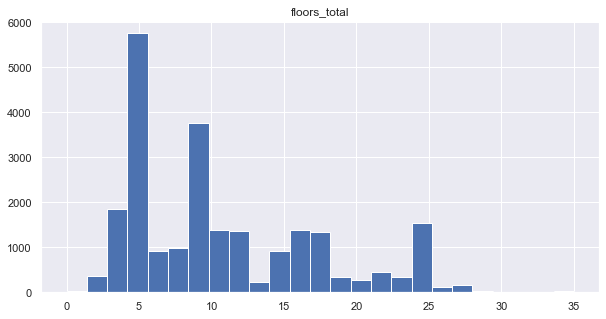

count    23512.000000
mean        10.680674
std          6.587942
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [41]:
data.hist('floors_total', bins=25, figsize = (10,5), range=(0,35))
plt.show()
print(data['floors_total'].describe())

Гистограмма по общему колличеству этажей в доме, в котором продается квартира. В основном дома 5ти этажные или 9ти этажные, но втречаются и гораздо более высокие дома.

- расстояние до центра города в метрах;

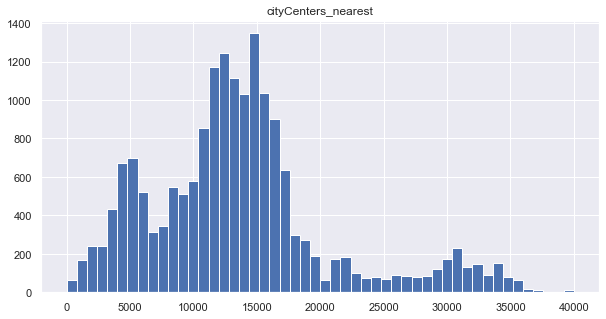

count    18037.000000
mean     14197.085934
std       8611.165678
min        181.000000
25%       9241.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [42]:
data.hist('cityCenters_nearest', bins=50, figsize = (10,5), range=(0,40000))
plt.show()
print(data['cityCenters_nearest'].describe())

Гистограмма по расстоянию до центра города. Можно увидеть два пика, первый более низкий, где расстояние до центра примерно 5км и второй более высокий пик, для расстояния до центра в примерно 15км.

- расстояние до ближайшего аэропорта;

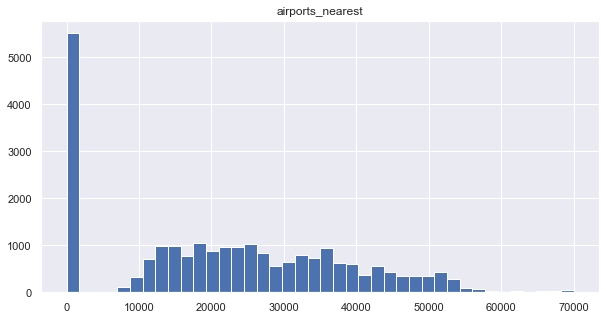

count    23512.000000
mean     22065.486858
std      16458.647165
min          0.000000
25%      10243.000000
50%      21860.000000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [43]:
data.hist('airports_nearest', bins=40, figsize = (10,5), range=(0,70000))
plt.show()
print(data['airports_nearest'].describe())

Гистограмма для расстояния до аэропорта. Здесь мы вдим большой столбец в нуле, это означает, что скорее всего там нет данных по расстоянию до аэропорта. Дальше квартиры распределены практически равномерно с расстояниями от 10 км до 50 км до ближайшего аэропорта.

- расстояние до ближайшего парка;

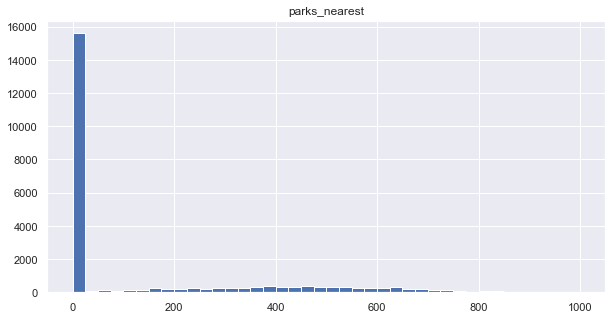

count    23512.000000
mean       167.237964
std        306.393671
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64


In [44]:
data.hist('parks_nearest', bins=40, figsize = (10,5), range=(0,1000))
plt.show()
print(data['parks_nearest'].describe())

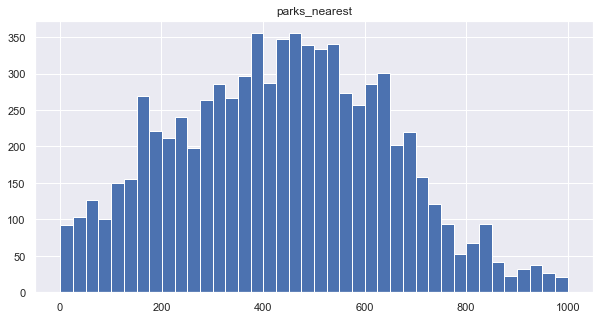

count    23512.000000
mean       167.237964
std        306.393671
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64


In [45]:
data.hist('parks_nearest', bins=40, figsize = (10,5), range=(1,1000))
plt.show()
print(data['parks_nearest'].describe())

Гистограммы для удаление квартиры от парка. Первая содержит большое колличество нулевых значений, поэтому там невозможно оценить удаленность остальных квартир от парка. На второй диаграмме мы отрезаем нулевые значения и можем увидеть, что удаленноть квартир от парков распрелелена нормально с средней удаленностью примерно в 450 метров.

- день и месяц публикации объявления.

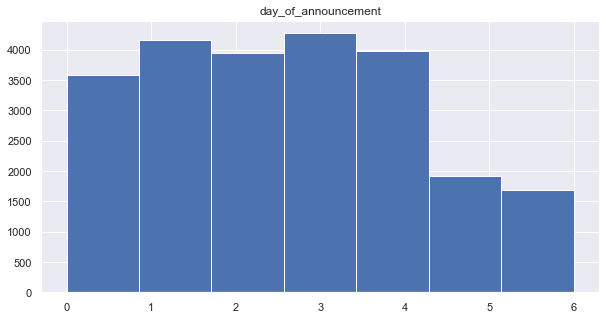

count    23512.000000
mean         2.567540
std          1.788159
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_announcement, dtype: float64


In [46]:
data.hist('day_of_announcement', bins=7, figsize = (10,5), range=(0,6))
plt.show()
print(data['day_of_announcement'].describe())

Гистограмма для дня публикации объявления. Можно увидеть, что в основном объявления публикуются с вторника по пятницу, в выходные наблюдается сильно снижение колличества публикаций.

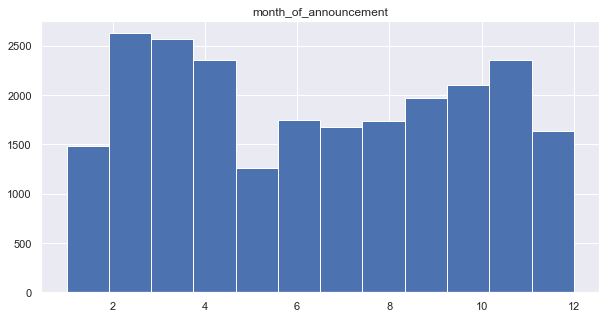

count    23512.000000
mean         6.403581
std          3.492930
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_announcement, dtype: float64


In [47]:
data.hist('month_of_announcement', bins=12, figsize = (10,5), range=(1,12))
plt.show()
print(data['month_of_announcement'].describe())

Гистограмма по месяцам публикации объявлений. Мы видим, что достаточно много объявлений публикуетсяв феврале и марте, а так же осенью.

#### <a name="task_4.2"></a> 4.2 Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

- Постройте гистограмму.

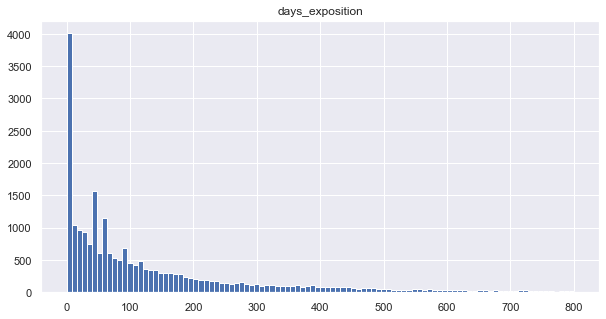

count    23512.000000
mean       156.414639
std        213.412757
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [48]:
data.hist('days_exposition', bins=100, figsize = (10,5), range=(0,800))
plt.show()
print(data['days_exposition'].describe())

Посчитайте среднее и медиану.

In [49]:
# Средняя
data['days_exposition'].mean()

156.4146393331065

In [50]:
# Медиана
data['days_exposition'].median()

73.0

В среднем продажа квартиры с момента появления объявления происходит за 156 дней. Быстрыми мы можем считать продажи, которые произошли быстрее чем через 73 дня.

In [51]:
data['days_exposition'].loc[data['days_exposition'] > 365].count()


3035

Как мы видим, в данных присутствуют квартиры, которые не могут продать уже более года, причем таких квартир достаточно много (~11%). 


Если ориентироваться на квантили:
    
 - быстро продавались квартиры, которые были в объявлениях меньше 22 дней
 - долго продавались квартиры, которые висели более 198 дней


#### <a name="task_4.3"></a> 4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?

В начале просто посмотрим корреляцию цен с остальными параметрами квартиры.

In [52]:
print(data.corr()[['last_price', 'area_price']].sort_values(by = 'area_price', ascending = False))

                       last_price  area_price
area_price               0.751385    1.000000
last_price               1.000000    0.751385
kitchen_area             0.440721    0.368071
total_area               0.643675    0.303102
ceiling_height           0.292662    0.294242
airports_nearest         0.110220    0.274346
parks_nearest            0.121239    0.216216
living_area              0.548899    0.212273
ponds_around3000         0.163603    0.190897
parks_around3000         0.158084    0.186182
ponds_nearest            0.092104    0.174637
floors_total            -0.010518    0.147594
total_images             0.108861    0.133977
floor                    0.021382    0.128197
rooms                    0.361055    0.055832
balcony                  0.009943    0.021521
days_exposition          0.054859    0.019741
studio                  -0.025777    0.015537
year_of_announcement    -0.043580    0.009406
open_plan               -0.008797    0.008021
month_of_announcement    0.000503 

Построим корреляцию площади квартиры и цены за квадратный метр. При этом не будем учитывать квартиры больше 200кв метров.

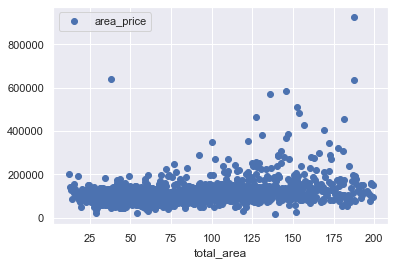

In [53]:
data.query('total_area<200').pivot_table(
    index='total_area', values='area_price', aggfunc='median'
).plot(style='o');

Корреляция цены и жилой площади.

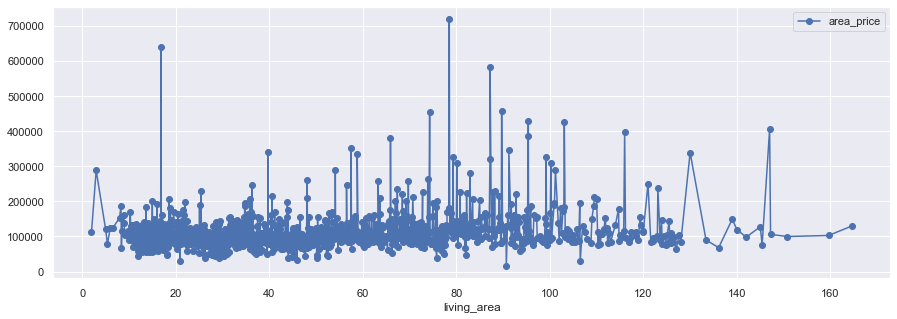

In [54]:
data.query('total_area<200').pivot_table(
    index='living_area', values='area_price', aggfunc='median'
).plot(style='o-', figsize = (15,5));

Корреляция цены и площади кухни

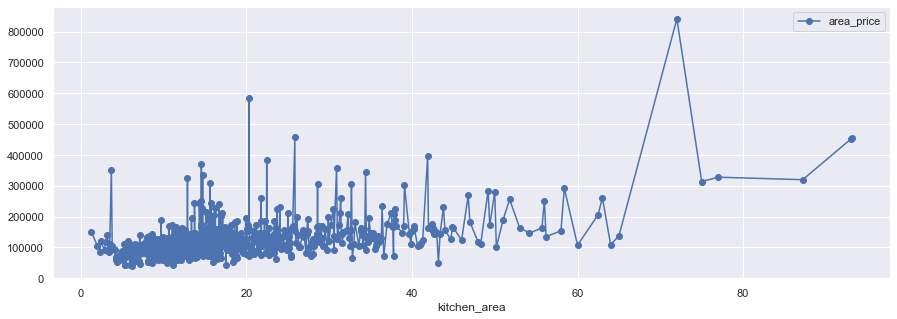

In [55]:
data.query('total_area<200').pivot_table(
    index='kitchen_area', values='area_price', aggfunc='median'
).plot(style='o-', figsize = (15,5));

Корреляция цены и колличества комнат

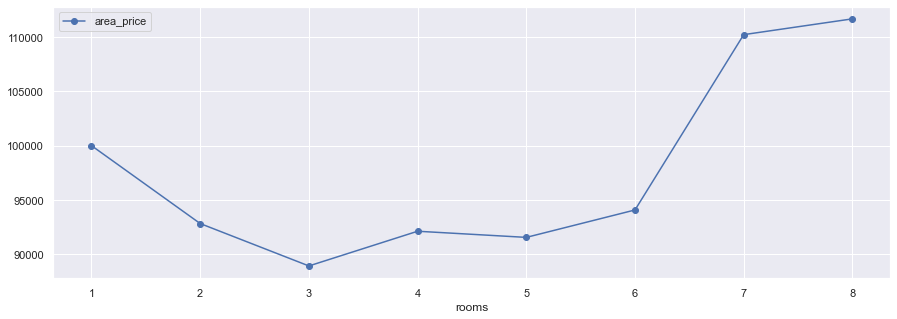

In [56]:
data.query('total_area<200').pivot_table(
    index='rooms', values='area_price', aggfunc='median'
).plot(style='o-', figsize = (15,5));

Корреляция цены и этажа, на котором расположена квартира

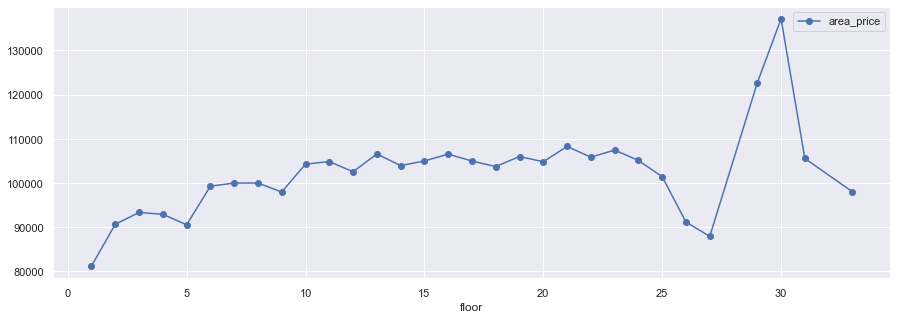

In [57]:
data.query('total_area<200').pivot_table(
    index='floor', values='area_price', aggfunc='median'
).plot(style='o-', figsize = (15,5));

Корреляция цены и даты размещения

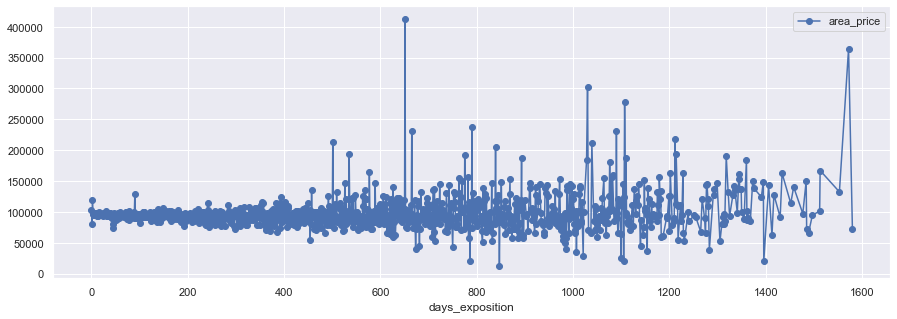

In [58]:
data.query('total_area<200').pivot_table(
    index='days_exposition', values='area_price', aggfunc='median'
).plot(style='o-', figsize = (15,5));


Как мы видим, квартиры, которые размещены недавно, имеют достаточно не большой разброс по ценам и при этом все имеют не очень высокую цену. Мы видим, что это не дорогие квартиры, которые имеют высокую ликвидность и соответственно такие квартиры не задерживаются на долго на досках объявлений. Чем больше времени с публикации объявления, тем больше разброс по ценам, мало покупателей найдется на очень дорогие квартиры, поэтому такие объявления могут висеть очень долго. Чем выше цена, тем меньше ликвидность квартиры и тем дальше покупатели будут выбирать и определяться с покупкой.



Из построенных выше графиков мы можем сказать, от каких параметров стоимость квартиры зависит сильно, а от каких – нет.

- По графику общей площади видно, что в целом цена квадратного метра не сильно изменяется в зависимости от общей площади квартиры, однако некоторые квартиры, все-таки начинают стоить больше (за один квадратный метр) с увеличением общей площади. Это может быть связано с тем, что квартиры большей площади как правило более элитные и их один квадратный метр может цениться больше, чем в маленьких, менее элитных квартирах.

- По графику жилой площади мы тоже можем сказать, что цена квадратного метра не сильно меняется в зависимости от размера жилой площади.

- На графике площади кухни мы видим, что квартиры с более большой площадью кухни и имеют немного большую стоимость квадратного метра и так же на графике мы можем увидеть сильный выброс с большой площадью кухни и стоимостью квадратного метра более 800т рублей.

- На графике количества комнат отличия уже более существенны. Один квадратный метр в однокомнатной квартире стоит дороже, чем в 2–6 комнатных квартирах, однако, начиная с 7-комнатных квартир, цена квадратного метра резко возрастает. Самыми дешевыми за квадратный метр являются 3-комнатные квартиры.

- На графике этажности квартиры мы видим, что этажи очень по-разному влияют на цену квадратного метра в квартире. 5и 9 этажи стоят сильно дешевле по сравнению с соседними, скорее всего это связано с тем, что часто эти этажи являются последними и никто не хочет жить на последнем этаже (с протекающей крышей и шумящим лифтом). Далее ценя за квадратный метр уже, не сильно меняется и падает только в районе 25-го этажа, а затем резко растет на 30ом этаже, но скорее всего это результат единичных не репрезентативных данных.

- Дата размещения не очень сильно влияет на цену квадратного метра. Для квартир, которые опубликованы до 300 дней назад цена квадратного метра имеет не большой разброс. Далее разброс увеличивается и среднем цена за квадратный метр понемногу растет, скорее всего это связано с тем, что долго висят более дорогие квартиры (такие квартиры имеют меньшую ликвидность), которые имеют более элитные ремонты и находится в более элитных районах, соответственно квадратный метр в таких квартирах будет стоить больше.


#### <a name="task_4.4"></a> 4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [59]:
loc_prices = data['locality_name'].value_counts().sort_values(ascending = False).head(10)
display(loc_prices)

Санкт-Петербург      15625
поселок Мурино         550
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Посчитаем среднюю чену квадратного метра в каждом населенном пункте

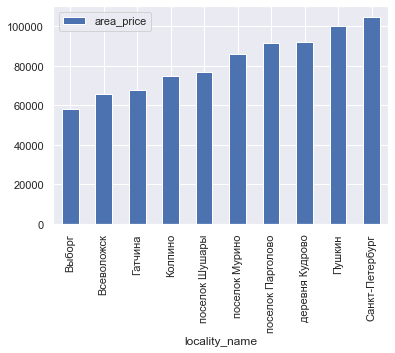

In [60]:
data.query('locality_name in @loc_prices.index').pivot_table(
    index='locality_name', values='area_price', aggfunc='median'
).sort_values('area_price').plot(kind='bar');

#### <a name="task_4.5"></a> 4.5 Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [61]:
data['cityCenters'] = (data['cityCenters_nearest']/1000).dropna().astype(int)
# data.head(10)

Посчитаем среднюю цену каждого километра.

In [62]:
data['price_km'] = data['last_price'] / data['cityCenters'].dropna().astype(int)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,area_price,day_of_announcement,month_of_announcement,year_of_announcement,floor_category,dist_to_centre_in_km,cityCenters,price_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,...,755.0,0.0,120370.370370,3,3,2019,Другой,16.0,16.0,8.125000e+05
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,0,...,0.0,81.0,82920.792079,1,12,2018,Первый,19.0,18.0,1.861111e+05
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,0,...,574.0,558.0,92785.714286,3,8,2015,Другой,14.0,13.0,3.996923e+05
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.00,9,0,...,234.0,424.0,408176.100629,4,7,2015,Другой,7.0,6.0,1.081667e+07
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,...,48.0,121.0,100000.000000,1,6,2018,Другой,8.0,8.0,1.250000e+06
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,0,...,0.0,55.0,95065.789474,0,9,2018,Другой,NaN,NaN,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,0,...,0.0,155.0,99195.710456,3,11,2017,Другой,19.0,19.0,1.947368e+05
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,30.50,22,0,...,0.0,0.0,110544.692737,3,4,2019,Другой,12.0,11.0,7.195455e+05
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,0,...,0.0,189.0,87454.764777,2,5,2018,Другой,NaN,NaN,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,0,...,0.0,289.0,88524.590164,6,2,2017,Другой,15.0,15.0,3.600000e+05


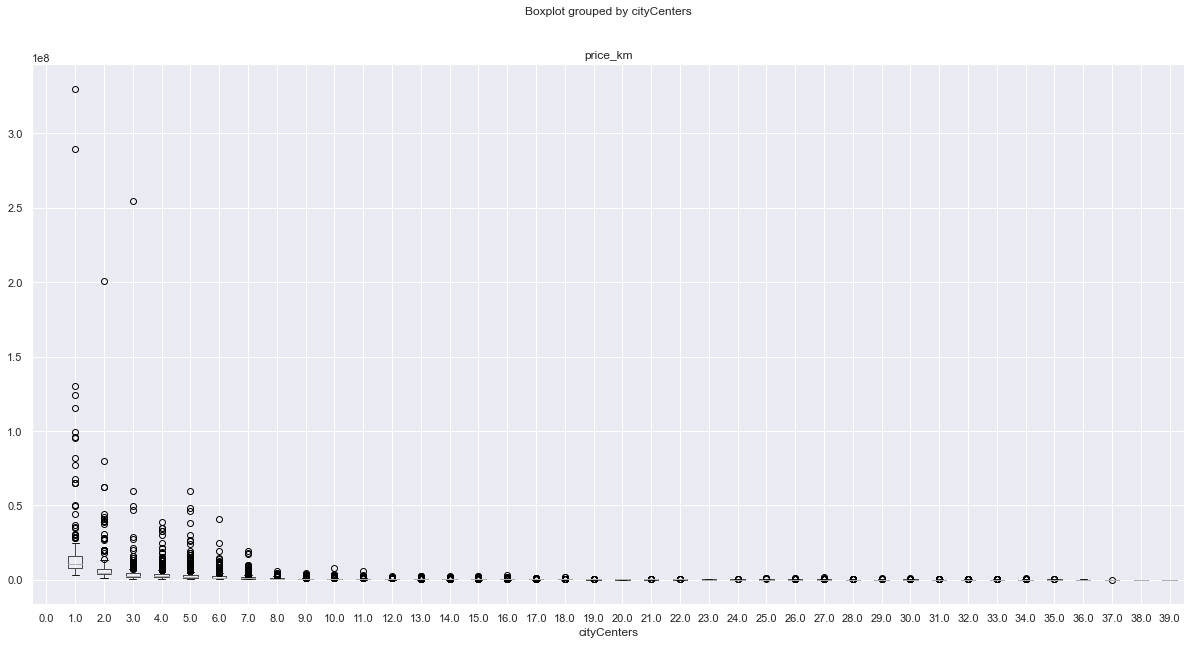

In [63]:
data.query('cityCenters<40').boxplot('price_km', by='cityCenters', figsize=(20,10));


На графике boxplot более наглядно видно, что цена  действительно зависит от расстояния до центра. Чем ближе квартира находится к центру, тем скорее всего выше будет ее цена.


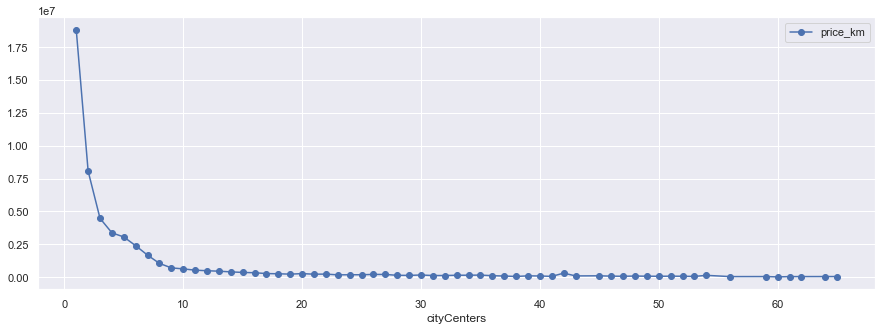

In [64]:
data.pivot_table(
    index='cityCenters', values='price_km'
).plot(style='o-', figsize = (15,5));

Здесь хорошо видно, что в первые несколько километров от центра, расстояние до него сильно влияет на стоимость квартиры, но дальше 15-ого километра цена уже не так сильно меняется, что означает, что дальше людям уже безразлично в 15 километрах они или в 50-ти.


### <a name="conclusion.5"></a> Общий вывод

После окончания исследования стоимости квартир в Санкт-Петербурге и близлежащий населенных пунктах можно сделать следующие выводы:

- Что влияет на стоимость квартиры и в какой степени:
    - Стоимость квартиры зависит от большого количества параметров. Все параметры в разной степени влияют на стоимость квартиры, какие-то в большей степени, какие-то в меньшей.

- Как влияют параметры самой квартиры:
    - Площадь кухни и общая площадь квартиры оказывают самое большое влияние на цену квартиры в положительную сторону.
    - В основном в продаже находятся квартиры от 25 кв метров и до 80.
    - На рынке превалируют квартиры с 2–3 комнатами, большее количество комнат встречается очень редко.
    - Диапазон высоты потолков тоже не очень большой. В основном это от 2.5 до 3-х метров.
    - В Питере и окрестностях в основном продаются квартиры на не высоких этажах (большая часть до 5–6 этажа).
    
- Как влияет география и инфраструктура:
    - Расстояние от центра оказывает самое большое отрицательное влияние на цену квартиры. Чем ближе к центру, тем выше цена квартиры, но после примерно десяти километров удаления от центра этот параметр почти теряет свое влияние на ценообразование квартиры.
    - Достаточно много квартир находится на расстоянии около 5 километров от центра и следующий, самый большой пик плотности квартир находится на расстоянии 15 километров от центра.
    - Наличие парка в пешей доступности от квартиры тоже оказывает сильное влияние на стоимость, в Питере бОльшое количество квартир находится в пределе одного километра от парка.
    
- Общие показатели:
    - Средняя стоимость, по которой продаются квартиры в Питере и его пригороде находится в районе 3–4 млн рублей.
    
- Статистика по объявлениям:
    - Объявления о продаже квартир в основном публикуются в будние дни и самые оживленные сезоны — это конец зимы и конец осени.
    - В среднем квартиры продаются за 4–5 месяцев.
    - Быстрее всего продаются квартиры с маленькой ценой и высокой ликвидностью.

